# Explore here

In [2]:
import ipyleaflet
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import pymysql
from dotenv import load_dotenv
import requests
from sklearn import datasets, model_selection, metrics
import seaborn as sns
import sqlalchemy
import sympy
import xgboost as xgb


In [21]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=';')


In [ ]:
total_data.head()
# label es el target

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
total_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
print(total_data.info())
total_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
total_data['quality'].value_counts().sort_index()


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Dado que la calidad va desde 3 a 8 siendo el 6 el 50% de los datos, quality=6 será calidad media, para que las clases estén más balanceadas, 

La columna objetivo es label:

0 = Baja calidad 3-5

1 = Calidad media ==6

2 = Alta calidad >6


In [41]:

df = total_data.copy() 

def quality_label(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df['label'] = df['quality'].apply(quality_label)



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop(['quality', 'label'], axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print(f"Accuracy con k=5: {accuracy_score(y_test, y_pred):.4f}")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Baja', 'Media', 'Alta']))


Accuracy con k=5: 0.8438
[[  1  10   0]
 [  1 250  11]
 [  0  28  19]]

Reporte de clasificación:
              precision    recall  f1-score   support

        Baja       0.50      0.09      0.15        11
       Media       0.87      0.95      0.91       262
        Alta       0.63      0.40      0.49        47

    accuracy                           0.84       320
   macro avg       0.67      0.48      0.52       320
weighted avg       0.82      0.84      0.82       320



✅ Mejor k: 15 con accuracy de 0.8594


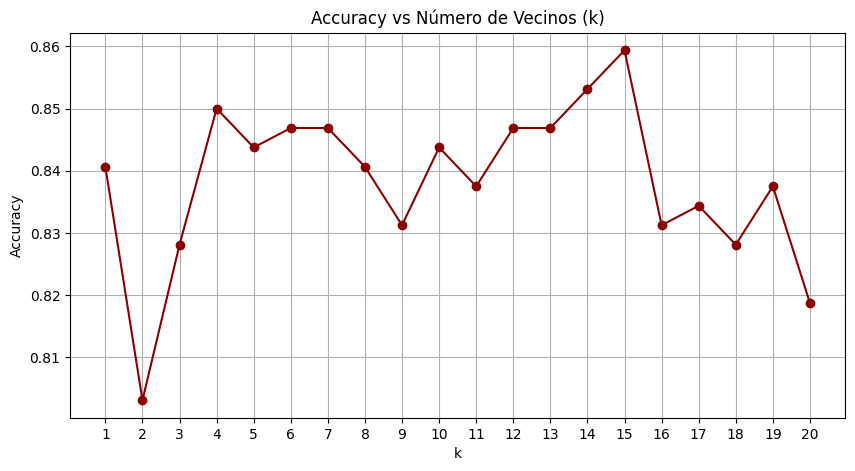

In [43]:
k_values = range(1, 21)
accuracies = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"✅ Mejor k: {best_k} con accuracy de {best_acc:.4f}")

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', color='darkred')
plt.title('Accuracy vs Número de Vecinos (k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [44]:

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
final_preds = final_knn.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, final_preds, target_names=['Baja', 'Media', 'Alta']))



Reporte de clasificación:
              precision    recall  f1-score   support

        Baja       0.00      0.00      0.00        11
       Media       0.87      0.97      0.92       262
        Alta       0.74      0.43      0.54        47

    accuracy                           0.86       320
   macro avg       0.54      0.47      0.49       320
weighted avg       0.82      0.86      0.83       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Mejor k basado en test set: 15 con accuracy de 0.8594


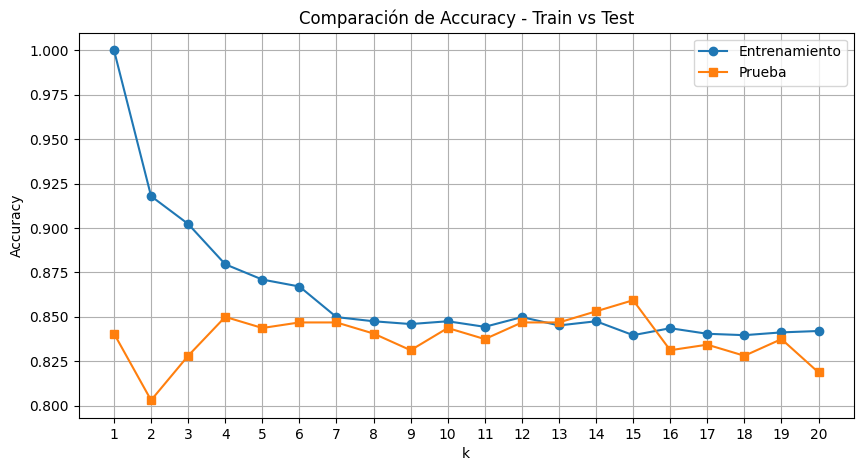

In [45]:
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Accuracy en entrenamiento y prueba
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Mostrar mejor k según test
best_k = k_values[np.argmax(test_accuracies)]
print(f"✅ Mejor k basado en test set: {best_k} con accuracy de {max(test_accuracies):.4f}")

# Graficar comparativa
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, label='Entrenamiento', marker='o')
plt.plot(k_values, test_accuracies, label='Prueba', marker='s')
plt.title('Comparación de Accuracy - Train vs Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


a pesar de conseguir el mejor accuray con k=1, estoy en claro overfitting, creo que sería mejor coger k=15, para conseguir mejores resultados.

In [51]:

# Entrenar modelo con k=15
final_knn = KNeighborsClassifier(n_neighbors=15)
final_knn.fit(X_train, y_train)

# Predicciones
y_train_pred = final_knn.predict(X_train)
y_test_pred = final_knn.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"🔹 Accuracy en entrenamiento: {train_acc:.4f}")
print(f"🔸 Accuracy en prueba:       {test_acc:.4f}")

# Reporte de clasificación en test
print("\nReporte de clasificación (test):")
print(classification_report(y_test, y_test_pred, target_names=["Baja", "Media", "Alta"]))


🔹 Accuracy en entrenamiento: 0.8397
🔸 Accuracy en prueba:       0.8594

Reporte de clasificación (test):
              precision    recall  f1-score   support

        Baja       0.00      0.00      0.00        11
       Media       0.87      0.97      0.92       262
        Alta       0.74      0.43      0.54        47

    accuracy                           0.86       320
   macro avg       0.54      0.47      0.49       320
weighted avg       0.82      0.86      0.83       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


he cambiado la clasificacón, de las clases de calidad, pq me daba un accuracy del 0.62. Y en ese caso era mejor el k=13